In [190]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset:

In [191]:
# fetch dataset
in_vehicle_coupon_recommendation = fetch_ucirepo(id=603)

# data (as pandas dataframes)
X = in_vehicle_coupon_recommendation.data.features
y = in_vehicle_coupon_recommendation.data.targets
X = pd.concat([X,y], axis = 1)   # Merge the two Dataset into one

First Inspection of the Dataset

In [192]:
print(X.head())

       destination  passenger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $3750

Pairplot

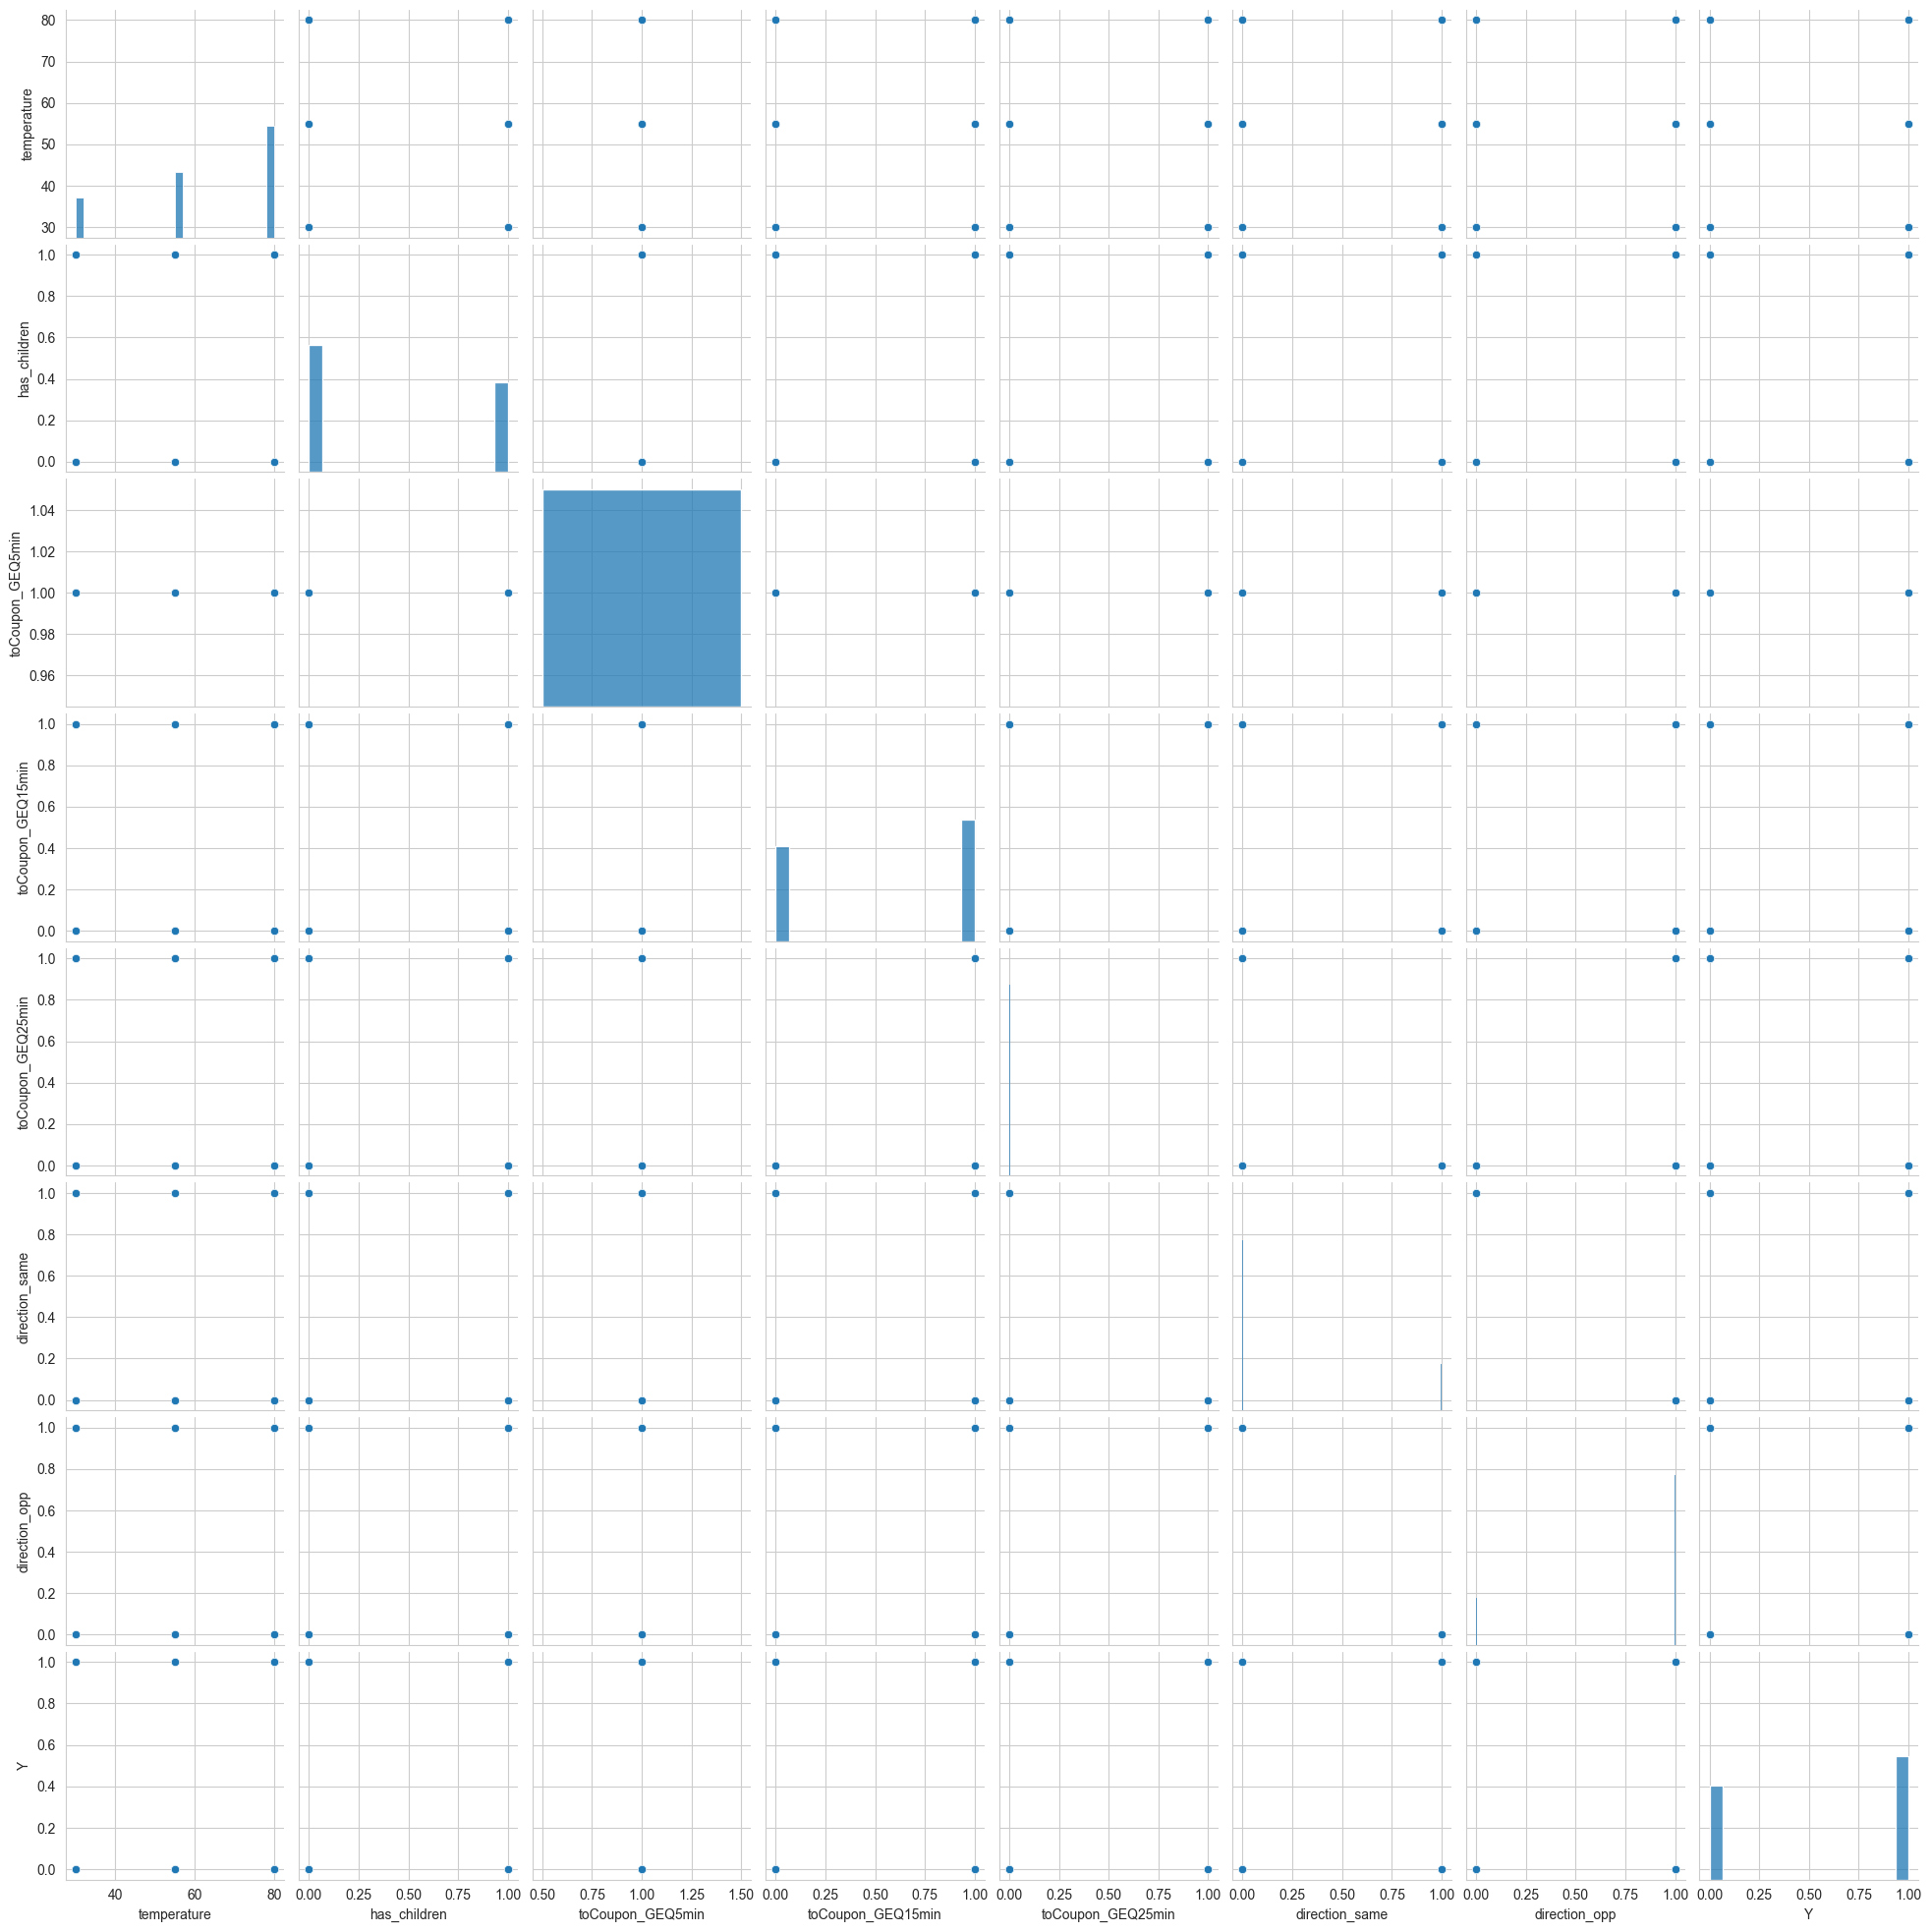

In [169]:
sns.pairplot(X)

Count the Target Variable

In [134]:
X['Y'].value_counts()

Y
1    6877
0    5202
Name: count, dtype: int64

Show correlation and correlation matrix

Y                    1.000000
temperature          0.061240
direction_same       0.014570
direction_opp       -0.014570
has_children        -0.045557
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
toCoupon_GEQ5min          NaN
Name: Y, dtype: float64


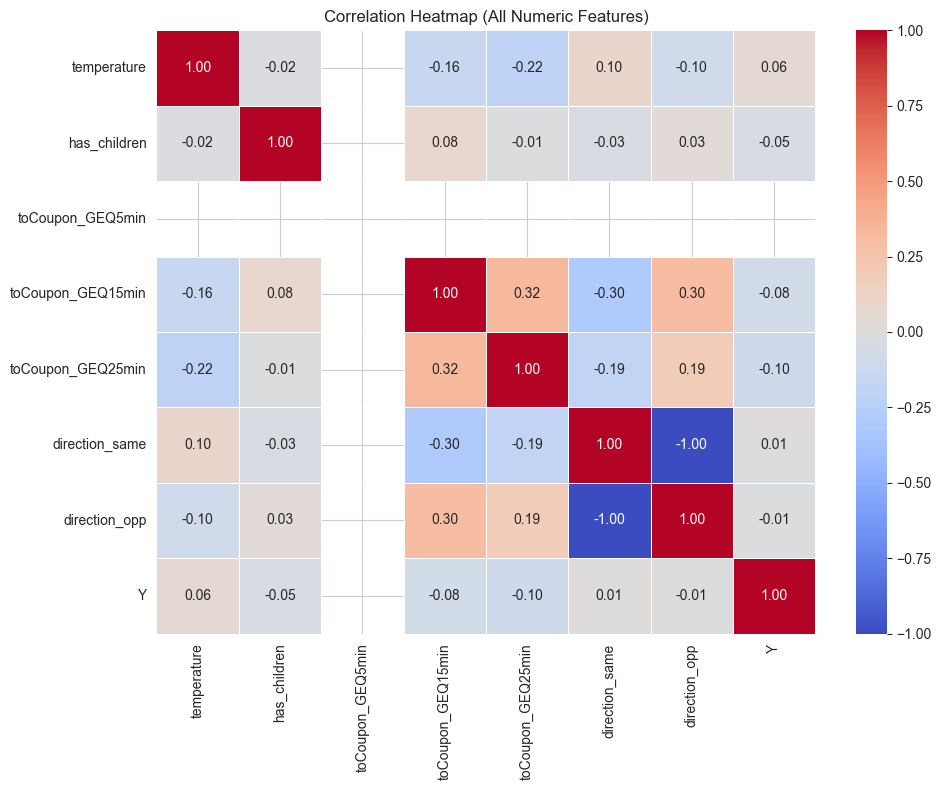

In [188]:
corr_matrix = X.corr(numeric_only='True')  # calculate correlation
target_corr = corr_matrix['Y'].sort_values(ascending=False)

print(target_corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (All Numeric Features)')
plt.tight_layout()
plt.show()



Distribution of Numerical Features

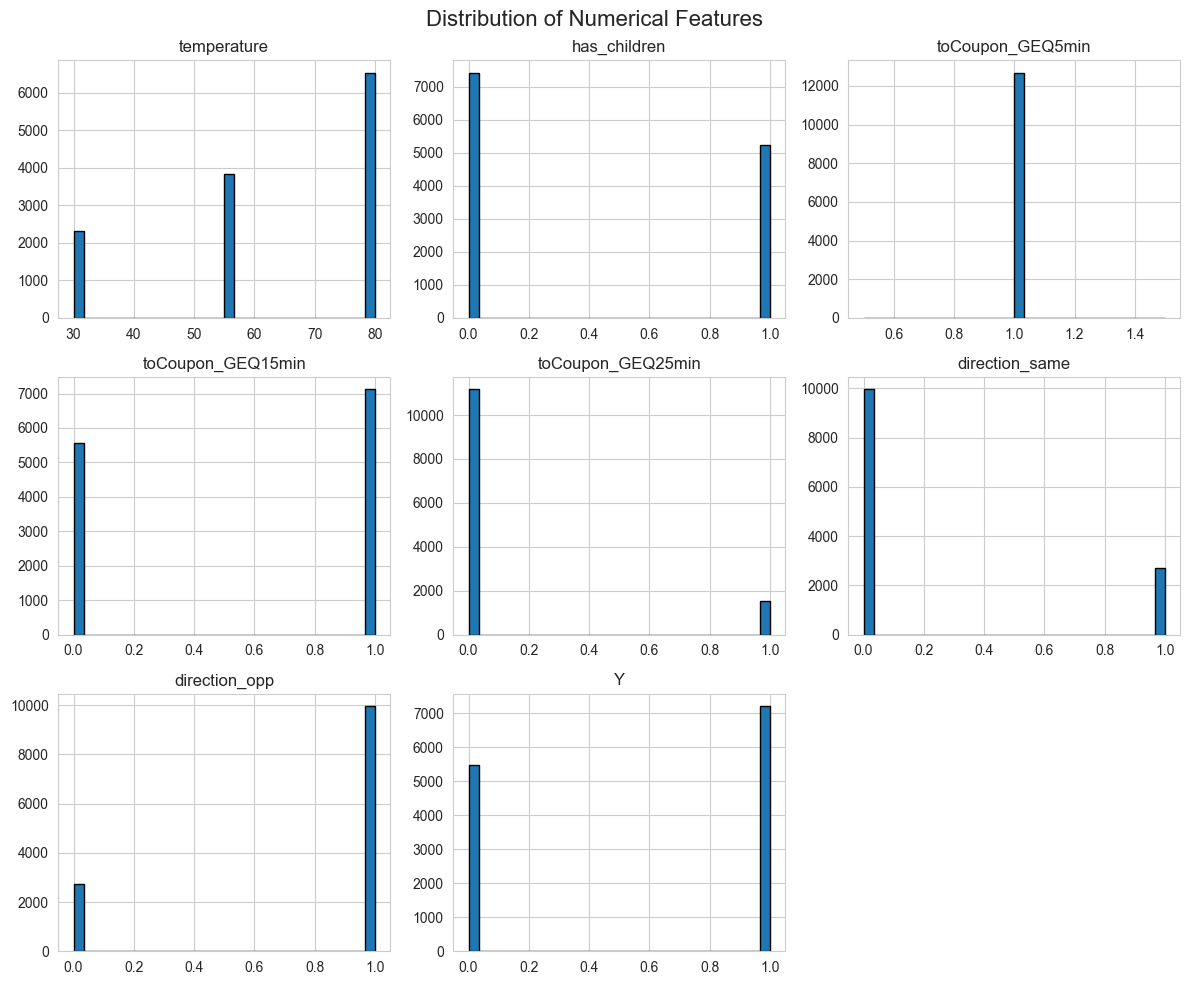

In [215]:
(X.hist(
    bins=30, figsize=(12, 10), edgecolor='black'
))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Distribution for all variables

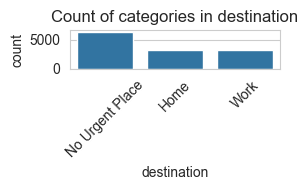

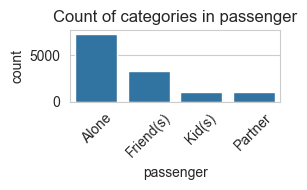

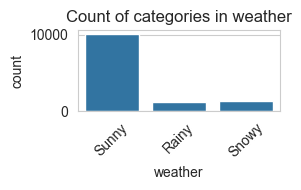

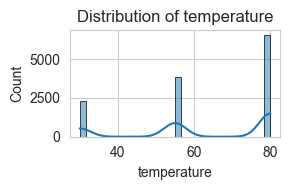

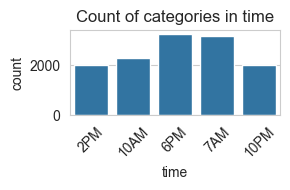

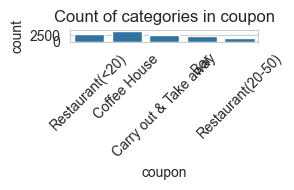

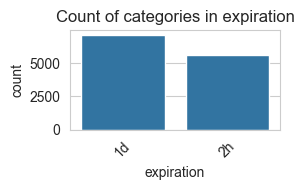

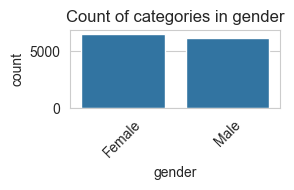

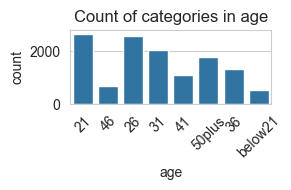

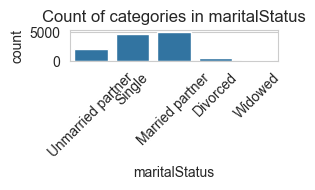

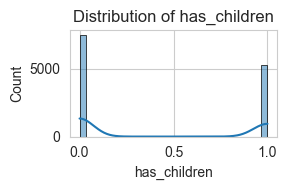

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


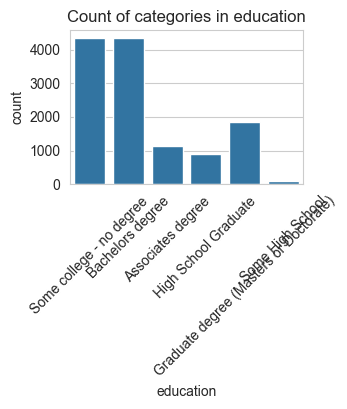

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


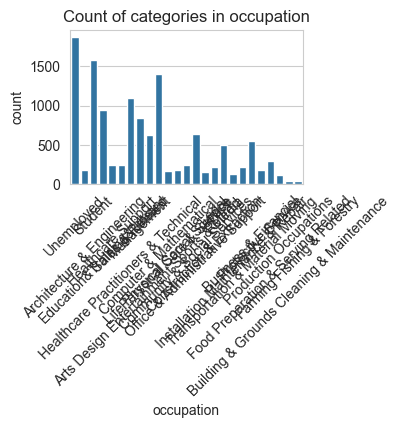

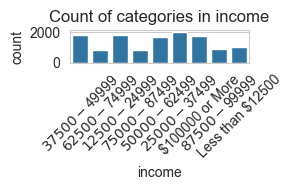

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


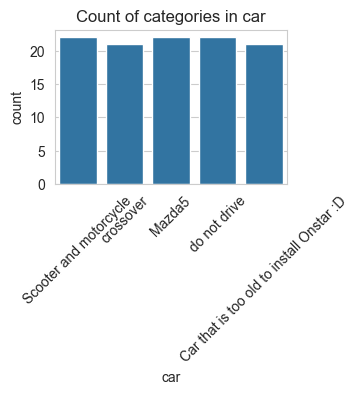

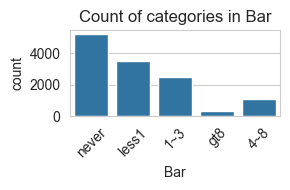

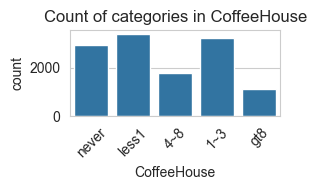

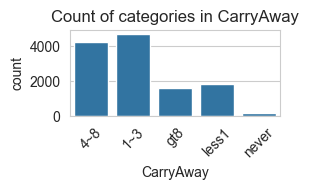

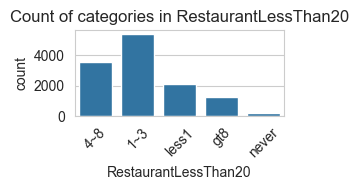

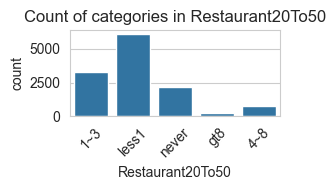

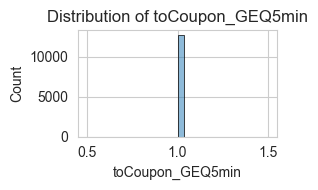

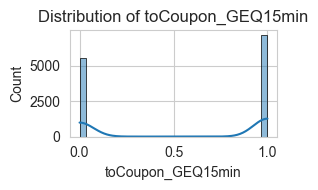

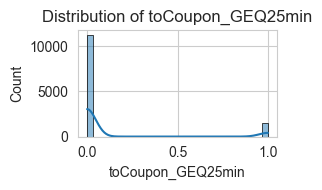

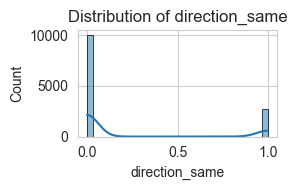

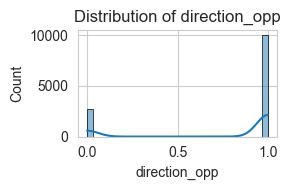

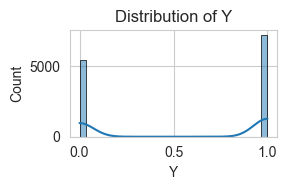

In [173]:
for col in X.columns:
    plt.figure(figsize=(3,2))
    if pd.api.types.is_numeric_dtype(X[col]):
        sns.histplot(X[col], bins=30, kde=True, edgecolor='black')
        plt.title(f'Distribution of {col}')
    else:
        sns.countplot(x=X[col])
        plt.title(f'Count of categories in {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Distribution of Age (sorted)

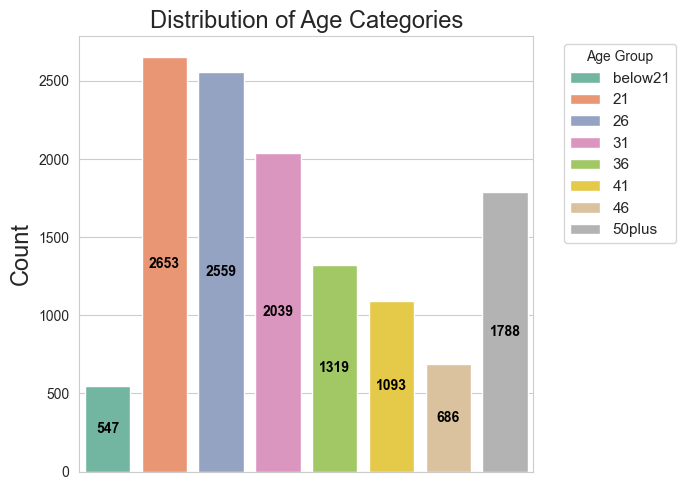

In [255]:

# Define order for age
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# Convert age to ordered categorical
X['age'] = pd.Categorical(X['age'], categories=age_order, ordered=True)

# Define color palette
palette = sns.color_palette("Set2", len(age_order))

plt.figure(figsize=(7, 5))

# Use hue=age and legend=False to avoid the deprecation warning
ax = sns.countplot(
    x='age',
    hue='age',
    data=X,
    order=age_order,
    palette=palette,
    legend=False
)

# Remove x-axis labels for compact layout
ax.set_xticklabels([])
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{int(height)}',
        ha='center', va='center',
        color='black', fontweight='bold'
    )

# Add title and y-label
plt.title('Distribution of Age Categories', size = 17)
plt.ylabel('Count', size = 17)

# Custom legend (cleaner and stable)
plt.legend(
    handles=ax.patches[:len(age_order)],
    labels=age_order,
    title='Age Group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize = 11
)

plt.tight_layout()
plt.show()


Distribution of occupation

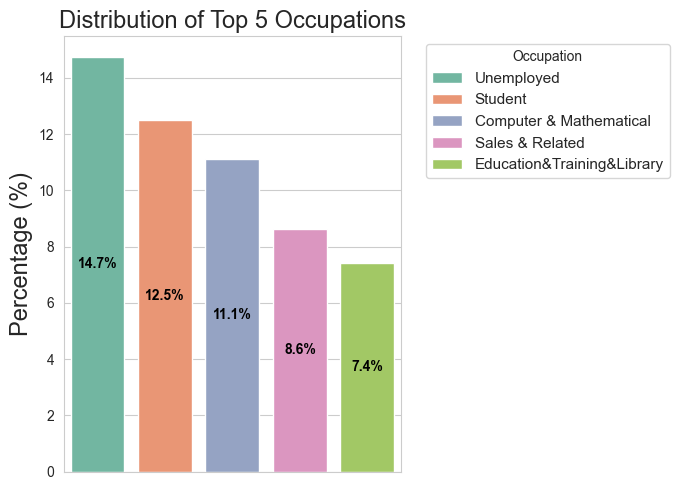

In [248]:

# Get top 5 occupations
top_occupations = X['occupation'].value_counts().index[:5]

# Define color palette
palette = sns.color_palette("Set2", len(top_occupations))

# Calculate normalized (percent) frequencies
occupation_counts = X['occupation'].value_counts(normalize=True) * 100
occupation_counts = occupation_counts[top_occupations]  # only top 5

plt.figure(figsize=(7, 5))

# Plot percentages manually (since sns.countplot shows counts)
ax = sns.barplot(
    x=occupation_counts.index,
    y=occupation_counts.values,
    hue=occupation_counts.index,
    palette=palette,
    legend=False
)

# Remove x-axis labels for compact layout
ax.set_xticklabels([])
ax.set_xlabel('')

# Set title and ylabel
plt.title('Distribution of Top 5 Occupations', size = 17)
plt.ylabel('Percentage (%)', size=17)

# Add percentage labels inside bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{height:.1f}%',
        ha='center', va='center',
        color='black', fontweight='bold'
    )

# Custom legend (colors → occupation names)
plt.legend(
    handles=ax.patches[:len(top_occupations)],
    labels=top_occupations.tolist(),
    title='Occupation',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
        fontsize = 11

)

plt.tight_layout()
plt.show()


Distribution of Coupon

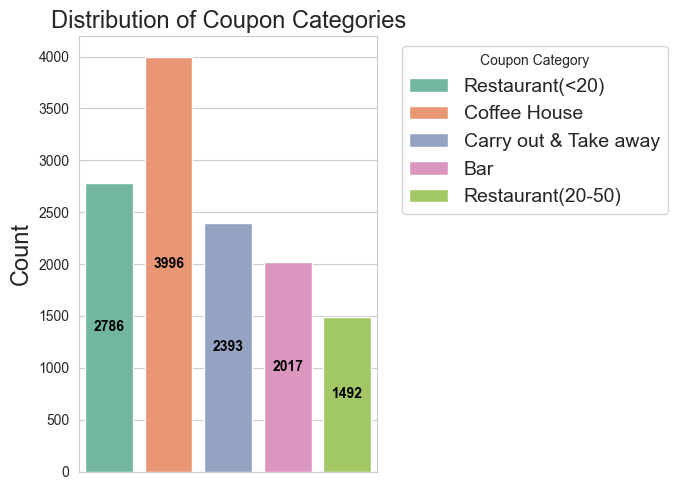

In [254]:

# Define color palette for each coupon type
palette = sns.color_palette("Set2", X['coupon'].nunique())

plt.figure(figsize=(7, 5))

# Plot with custom colors per category
ax = sns.countplot(
    x='coupon',
    hue='coupon',
    data=X,
    palette=palette,
    legend=False
)

# Remove x-axis labels to make it more compact
ax.set_xticklabels([])
ax.set_xlabel('')

# Add title and ylabel
plt.title('Distribution of Coupon Categories', size = 17)
plt.ylabel('Count', size= 17)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{int(height)}',
        ha='center', va='center',
        color='black', fontweight='bold'
    )

# Create legend manually (for bar descriptions)
handles, labels = ax.get_legend_handles_labels()

unique_labels = X['coupon'].unique()
plt.legend(
    ax.patches[:len(unique_labels)],
    unique_labels,
    title='Coupon Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
        fontsize = 14

)

plt.tight_layout()
plt.show()


Distribution of Car

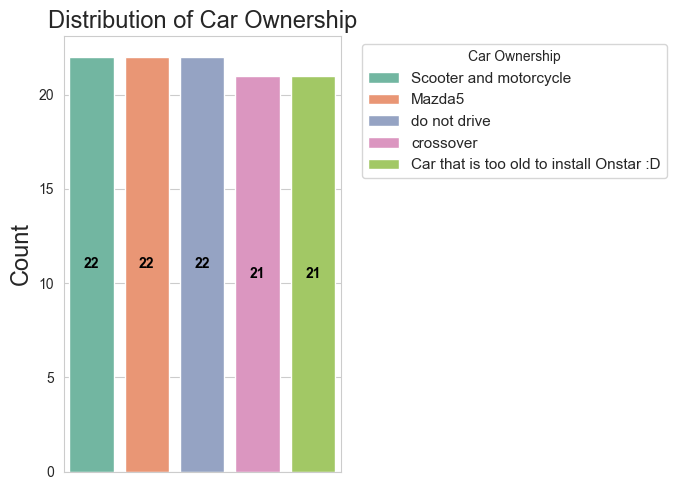

In [245]:

# Count the occurrences of each car category
car_counts = X['car'].value_counts().reset_index()
car_counts.columns = ['Car', 'Count']

# Define color palette
palette = sns.color_palette("Set2", len(car_counts))

plt.figure(figsize=(7, 5))

# Plot with Seaborn (using hue for legend colors)
ax = sns.barplot(
    x='Car',
    y='Count',
    hue='Car',
    data=car_counts,
    palette=palette,
    legend=False
)

# Remove x-axis labels for compact layout
ax.set_xticklabels([])
ax.set_xlabel('')

# Set title and y-axis label
plt.title('Distribution of Car Ownership', size = 17)
plt.ylabel('Count', size=17)

# Add count labels centered on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{int(height)}',
        ha='center', va='center',
        color='black', fontweight='bold'
    )

# Add legend on the right
plt.legend(
    handles=ax.patches[:len(car_counts)],
    labels=car_counts['Car'].tolist(),
    title='Car Ownership',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
        fontsize = 11

)

plt.tight_layout()
plt.show()


PREPROCCESING STEPS

Missing values per feature:
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64


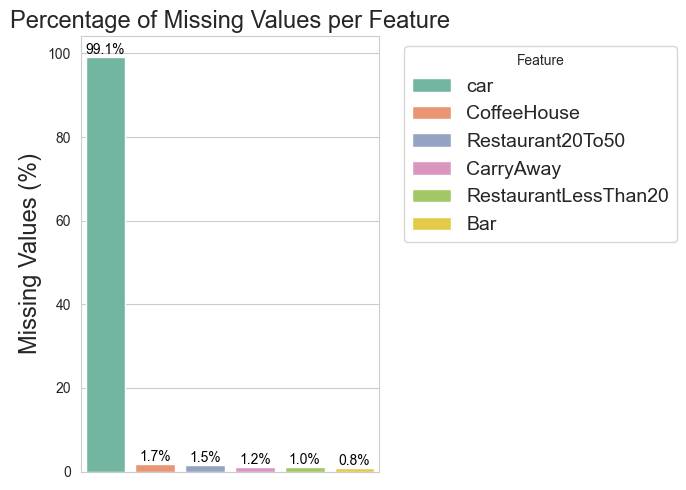

In [243]:

# 1. Calculate percentage of missing values per column
missing_percent = X.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Print missing counts for reference
print("Missing values per feature:")
print(X.isnull().sum()[X.isnull().sum() > 0].sort_values(ascending=False))

# Prepare data for plotting
missing_df = pd.DataFrame({
    'Feature': missing_percent.index,
    'MissingPercent': missing_percent.values
})

# Define color palette
palette = sns.color_palette("Set2", len(missing_df))

plt.figure(figsize=(7, 5))

# 2. Plot using Seaborn barplot (percentages)
ax = sns.barplot(
    x='Feature',
    y='MissingPercent',
    hue='Feature',
    data=missing_df,
    palette=palette,
    legend=False
)

# Remove x-axis labels for compact layout
ax.set_xticklabels([])
ax.set_xlabel('')

# 3. Add title and y-axis label
plt.title('Percentage of Missing Values per Feature', size = 17)
plt.ylabel('Missing Values (%)', size=17)

# 4.Use of container
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', color='black')

# 5. Add legend on the right
plt.legend(
    handles=ax.patches[:len(missing_df)],
    labels=missing_df['Feature'].tolist(),
    title='Feature',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize = 14
)

plt.tight_layout()
plt.show()
